In [1]:
%ls

README.md                            job_example.sh
binned_ds_10/                        top100threads_dirty/
binned_ds_6/                         top100threads_liwc_reduced/
cfb_api.py                           top100threads_liwc_reduced_labelled/
cfbd api.ipynb                       win_probs/
cfbd_example.py                      wp_distribution.ipynb
game_threads.csv


The wp_delta threshold for having approximately 1/3 of the data points within it is: 0.03720849749999999
The percentage of values within the range [-0.03720849749999999, 0.03720849749999999] is: 36.999321113374066%


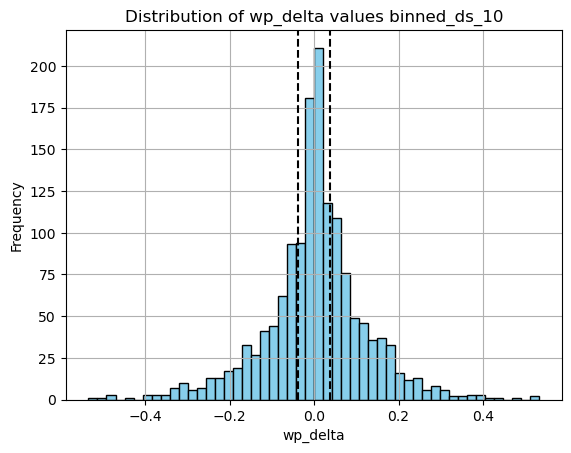

In [5]:
import os
import json
import matplotlib.pyplot as plt

def plot_wp_delta_distribution(directory):
    wp_delta_values = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            
            # Read JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                
            for entry in data:
            
                # print(entry)
                # Append wp_delta value to list
                wp_delta_values.append(entry['wp_delta'])
    
    # Plot the distribution of wp_delta values
    plt.hist(wp_delta_values, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('wp_delta')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of wp_delta values {directory}')
    plt.grid(True)
    
    
    # Sort wp_delta_values
    wp_delta_values.sort(reverse=True)
    
    # Calculate threshold index
    one_third_index = int(len(wp_delta_values) / 3)
    
    # Choose threshold value
    wp_delta_threshold = abs(wp_delta_values[one_third_index])
    print(f"The wp_delta threshold for having approximately 1/3 of the data points within it is: {wp_delta_threshold}")

    # Count values within the threshold range
    within_threshold_count = sum(1 for val in wp_delta_values if -wp_delta_threshold <= val <= wp_delta_threshold)
    
    # Calculate percentage
    total_count = len(wp_delta_values)
    percentage_within_threshold = (within_threshold_count / total_count) * 100
    print(f"The percentage of values within the range [-{wp_delta_threshold}, {wp_delta_threshold}] is: {percentage_within_threshold}%")
    
    plt.axvline(wp_delta_threshold, color='k', linestyle ='--')
    plt.axvline(-wp_delta_threshold, color='k', linestyle ='--')
    plt.show()

# Specify the directory containing the JSON files
bin_10 = 'binned_ds_10'

# Call the function to plot the distribution
plot_wp_delta_distribution(bin_10)

The wp_delta threshold for having approximately 1/3 of the data points within it is: 0.02412995699999998
The percentage of values within the range [-0.02412995699999998, 0.02412995699999998] is: 35.09054325955734%


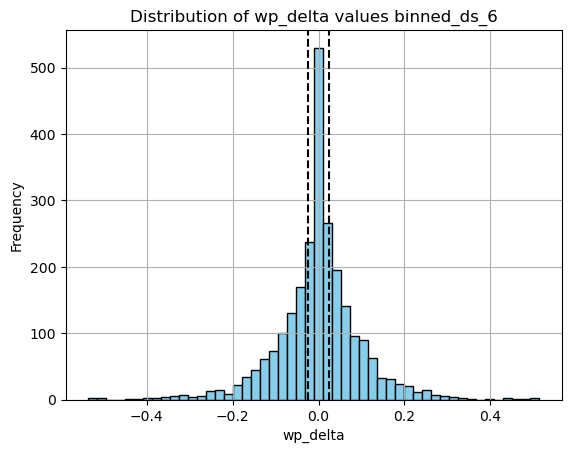

In [6]:
# Specify the directory containing the JSON files
bin_6 = 'binned_ds_6'

# Call the function to plot the distribution
plot_wp_delta_distribution(bin_6)